# Homework 1: Perceptrons
### Due Thursday, January 17, 2019, 5pm
#### Jesse Zhu
#### ML-W2019

Using the MNIST hand-written digits dataset, we aim to use perceptrons to categorize the labeled data through supervised learning. As this is a single-layer, the result is not expected to be perfect, but should be noticeably better than random. Each data point will be 785 values between 0 and 1, representing the grayscale value of each pixel in the original image. These values will be used to update our weight values over the course of 50 epochs, resulting in our 10 perceptrons (digits 0 to 9) being trained at the end. Finally, we will run test data through these trained perceptrons and take the maximum value of the 10 perceptrons as the predicted result.

In [70]:
#import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [30]:
#IMPORT DATA#################
testfile = "mnist_test.csv"
trainfile = "mnist_train.csv"

# test_data = pd.read_csv(testfile)
# train_data = pd.read_csv(trainfile)

#Data is 785 columns by N rows. First column = Label (0-9), others = 0:255
test_data = np.genfromtxt(testfile, skip_header=True, delimiter=',')
train_data = np.genfromtxt(trainfile, skip_header=True, delimiter=',')

#PREPROCESSING###############

#SCALE by 255
test_data[:,1:] /= 255
train_data[:,1:] /= 255
#print((test_data[0,:]))

In [218]:
#Accuraccy function
def acc(weights, data, debug = 0):
    """
    input: 
        weights: matrix of 785 weights by 10 classes, where the first weight is the bias
        data: matrix of N data points by 785 values, where the first value is the target (0-9), and the rest are
            scaled gray-scale values between 0 and 1
    output: Percentage of correct classifications, where a classification is taken using the highest perceptron
        output value
    """
    length = len(data[:,0])
    xi = np.append(np.ones([length,1]), data[:, 1:],1)
    out = xi @ weights[:, :]
    amax = out.argmax(axis=1)
    if debug:
        print(out.shape)
        print(amax[0:25])
    ret = np.sum(amax == data[:,0])
    return ret/length

#Confusion matrix
def cm(weights, data):
    length = len(data[:,0])
    xi = np.append(np.ones([length,1]), data[:, 1:],1)
    m = np.zeros([11,11])
    m[0,1:] = np.arange(10)
    m[1:,0] = np.arange(10)
    
    for i in range(0, length):
        actual = int(data[i, 0])
        predic = int((xi[i,:] @ weights).argmax(axis=0))
        m[actual+1, predic+1] += 1
        
    return m.astype(int)

#Drawing function
def draw_digit(data):
    """
    input:
        1x785 matrix of grayscaled pixel values
    output: image of (1:785 pixels, skipping first label)
    """
    img = np.reshape(data[1:], (28, 28))
    print(img)
    plt.imshow(img)
    plt.show
    
#Training function
def train(weights, data, lr, debug = 0):
    """
    input: 
        weights: matrix of 785 weights by 10 classes, where the first weight is the bias
        data: matrix of N data points by 785 values, where the first value is the target (0-9), and the rest are
            scaled gray-scale values between 0 and 1
        lr: learning rate (~ 0 to 1)
    output:
        Altered input weights matrix
    """
    length = len(data[:,0])

    for i in range(0,length):
        xi = np.append([1], data[i, 1:]) #add "1" to input beginning for offset -> 1x785
        out = np.add((data[i, 1:] @ weights[1:, :]), weights[0, :]) #1 by 10 matrix

        target = np.zeros(10)
        tindex = int(data[i,0])
        target[tindex] = 1 #1x10 of 0s, with target index = 1
      
        out[out < 0] = 0
        out[out > 0] = 1
        if i == 0 and debug:
            print(target-out)

        deltaw = lr * np.outer(xi,(target - out)) #785x1 * 1x10 = 785x10
        if i == 0 and debug:
            print(deltaw[0:10,0:5])
            print(xi[0:10])
            print(deltaw.sum())
            print(weights.sum())

        weights += deltaw
        if i == 0 and debug:
            print(weights.sum())
    
    return

In [187]:
init_weights = (np.random.rand(785,10) * 0.10) - 0.05
learning_rates = [0.001, 0.01, 0.1, 1.0]

***RATE =  0.001 ***************
[[   0    0    1    2    3    4    5    6    7    8    9]
 [   0  953    0   13    2    2    4    5    1    0    0]
 [   1    0 1078    3    6    0   18    1    1   26    2]
 [   2   12    2  940   19   13    9   10   10   10    7]
 [   3    2    1   20  887    2   75    3    9    3    8]
 [   4    6    4   11   15  836    6    7    0    3   94]
 [   5   19    2   21   32   22  758   10    2   12   14]
 [   6   29    2   19    0    9   33  861    1    3    1]
 [   7   13    9   37   23    6   18    1  881    1   38]
 [   8   24   10   46   77   20  115    9    5  651   17]
 [   9   16    3   22   71   29   29    1   19    3  816]]
final test acc =  0.8661866186618662
final train acc =  0.8416806946782447


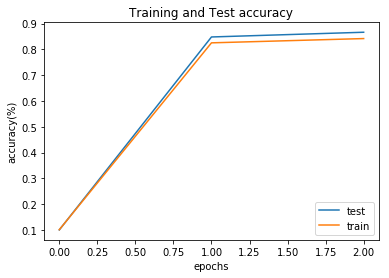

***RATE =  0.01 ***************
[[   0    0    1    2    3    4    5    6    7    8    9]
 [   0  937    0    1    3    1   22   12    2    1    1]
 [   1    0 1032    0    3    0   90    0    1    7    2]
 [   2    2    4  923   22    8   22   11   15   10   15]
 [   3    2    0   10  802    0  182    0    6    0    8]
 [   4    0    2    3    7  701    5   16    3    1  244]
 [   5    6    1    9   16    6  818    6    1    7   22]
 [   6   12    2    6    0    5   62  867    3    0    1]
 [   7    0   13   13   10    5   13    0  924    0   49]
 [   8    8    6   16  102   10  178    6   22  565   61]
 [   9    5    2   12   26    7   16    2   13    1  925]]
final test acc =  0.8494849484948495
final train acc =  0.8286471441190687


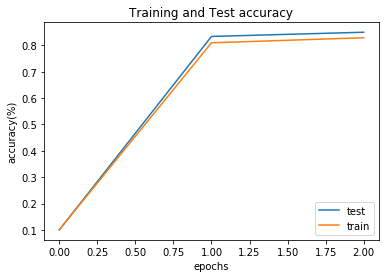

***RATE =  0.1 ***************
[[   0    0    1    2    3    4    5    6    7    8    9]
 [   0  950    0   11    1    1    5   10    2    0    0]
 [   1    0 1111    4    0    5    9    2    1    3    0]
 [   2   12   15  902    0   31    4   22   19   14   13]
 [   3    4   24   44  752   15  108    4   15    6   38]
 [   4    1    1    1    0  850    0   13    1    1  114]
 [   5   12    3   34    7   51  710   19    9   16   31]
 [   6    9    5    4    0    9   23  906    2    0    0]
 [   7    2   19   13    1   15    0    5  929    1   42]
 [   8   17   52   32    7   65   24   15   21  710   31]
 [   9    8    5   13    7   41    5    2   22    1  905]]
final test acc =  0.8725872587258726
final train acc =  0.8413806896781613


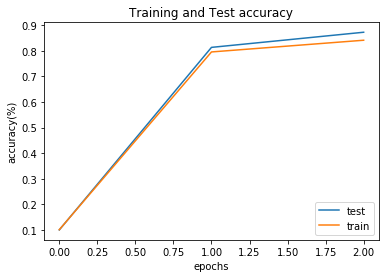

***RATE =  1.0 ***************
[[   0    0    1    2    3    4    5    6    7    8    9]
 [   0  967    0    6    0    1    3    2    1    0    0]
 [   1    0 1069    7    0    0   39    0    1   19    0]
 [   2   15    1  956    0   16    5    9    9   18    3]
 [   3    9    0  111  559    6  291    1   10   18    5]
 [   4    3    1   12    0  891    2    7    3    2   61]
 [   5   18    1   32    1   11  803    2    3   16    5]
 [   6   22    3   21    0   10   84  812    2    4    0]
 [   7    5   12   39    0   15    6    1  929    3   17]
 [   8   30    5   49    2   18   70    2   12  786    0]
 [   9   21    6   39    9   67   22    0   57   15  773]]
final test acc =  0.8545854585458545
final train acc =  0.8345472424540409


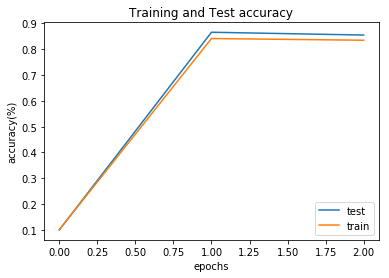

In [221]:
#draw_digit(test_data[0, :])
for rate in learning_rates:
    print("***RATE = ",rate,"***************")
    w = np.copy(init_weights)
    acc_test = []
    acc_train = []

    acc_test.append(acc(w, test_data))
    acc_train.append(acc(w, train_data))

    for i in range(0,50):
        train(w, train_data, rate)
        acc_test.append(acc(w, test_data))
        acc_train.append(acc(w, train_data))

    print(cm(w, test_data))
    print("final test acc = ", acc_test[len(acc_test)-1])
    print("final train acc = ", acc_train[len(acc_train)-1])

    plt.plot(acc_test)
    plt.plot(acc_train)
    plt.xlabel("epochs")
    plt.ylabel("accuracy(%)")
    title = "Training and Test accuracy, learning rate = " + str(rate)
    plt.title("Training and Test accuracy")
    plt.legend(("test", "train"),loc='lower right')
    plt.show()

## Discussion
#### LR = 0.001:
'6' is most often classified incorrectly, and is often mistaken as '4'.

#### LR = 0.01:
'6' is most often classified incorrectly, and is often mistaken as '4'.

#### LR = 0.1:
'6' is most often classified incorrectly, and is often mistaken as '4'.

#### LR = 1:
'6' is most often classified incorrectly, and is often mistaken as '4'.

Comparison:
The lower learning rates gave a slightly smoother curve than the higher learning rates.

### Appendix of Resources
1. Matrix multiplication
https://stackoverflow.com/questions/21562986/numpy-matrix-vector-multiplication

```python
a = np.random.rand(1,3)
b = np.random.rand(3,5)
print(a@b)

print(np.zeros([3,3]))

np.add([1, 2, 3], [5, 5, 0])
```

2. Argmax arrays
https://stackoverflow.com/questions/5469286/how-to-get-the-index-of-a-maximum-element-in-a-numpy-array-along-one-axis
```python
mm.argmax(axis=1)
```

3. Plotting 2d arrays
https://stackoverflow.com/questions/16492830/colorplot-of-2d-array-matplotlib

4. Count # Equal Array Elements
https://stackoverflow.com/questions/25490641/check-how-many-elements-are-equal-in-two-numpy-arrays-python
```python
np.sum(a == b)
```

5. Multiplying 1-D arrays / transposing
https://stackoverflow.com/questions/23566515/multiplication-of-1d-arrays-in-numpy
```python
b[:, None]
```

6. Positive/Negative values -> 1, 0
https://stackoverflow.com/questions/10335090/numpy-replace-negative-values-in-array

```python
f = np.array([-2, -1, 0, 0, 3, 5, -4])
f[f < 0] = 0
f[f > 0] = 1
```

7. Python numpy references vs call by reference?
https://stackoverflow.com/questions/11585793/are-numpy-arrays-passed-by-reference/11585888
`weights = np.add(weights, deltaw) #DOES NOT WORK`

`weights += blah` works

In [133]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = [10, 11, 12]
a[1,:] = np.add(a[1,:], b)
print(2*a)
print(7-a)
c = np.array([0.1, 0.2, 0.3, -0.4, -0.5, -0.6])
print(np.ceil(c))
d = np.array([[1, 2, 3, 4, 5]])
e = np.array([[0, 0, 1]])
print(np.transpose(d)@e)
f = np.array([-2, -1, 0, 0, 3, 5, -4])
f[f < 0] = 0
f[f > 0] = 1
print(f)
g = np.zeros(5)
g[4] = 1
print(g)
a1 = [1, 2, 3, 4, 5]
b1 = [10, 10, 10]
print(np.outer(a1,b1))

[[ 2  4  6]
 [28 32 36]]
[[  6   5   4]
 [ -7  -9 -11]]
[ 1.  1.  1. -0. -0. -0.]
[[0 0 1]
 [0 0 2]
 [0 0 3]
 [0 0 4]
 [0 0 5]]
[0 0 0 0 1 1 0]
[0. 0. 0. 0. 1.]
[[10 10 10]
 [20 20 20]
 [30 30 30]
 [40 40 40]
 [50 50 50]]


In [202]:
c1 = np.array([[1, 2, 3],[1,2,3]])
d1 = np.ones([2,1])
print(d1)
e1 = np.append(d1, c1, 1)
print(e1)

[[1.]
 [1.]]
[[1. 1. 2. 3.]
 [1. 1. 2. 3.]]
